<a href="https://colab.research.google.com/github/jcmachicao/uc_curso_modelamientopredictivo/blob/master/modpred__07_visualizacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**7**
#### Cuaderno 7
# **Curso Modelamiento Predictivo**
---
### **Visualización de Bases de Datos**
* Autor: José Carlos Machicao
* Licencia: [GestioDinámica](http://www.gestiodinamica.com) 2020

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [ ]:
ruta = 'drive/My Drive/2020 Cursos/2020 Modelamiento Predictivo/uc_modpred_materiales/modpred_foldercompartido/'
import os
os.listdir(ruta)

In [8]:
archivo = 'bd_pnp_modpred.xlsx'

In [ ]:
#data = pd.read_excel(ruta + archivo)
data.info()
#data.to_pickle(ruta + 'data_pnp.pkl')

In [ ]:
fecha_int = []
for it in data.FECHA_HECHO:
  it_int = int(it.timestamp())/1000/60/60/24
  fecha_int.append(it_int)
data['fecha_int'] = fecha_int
data.info()

In [18]:
data['fh'] = pd.to_datetime(data.FECHA_HECHO, unit='ms')

In [19]:
data['fh_anho'] = pd.DatetimeIndex(data.fh).year
data['fh_dsem'] = pd.DatetimeIndex(data.fh).dayofweek
data['fh_hdia'] = pd.DatetimeIndex(data.fh).hour

In [23]:
data.SITUACION.unique()

array(['SOLICITANTE', 'AGRAVIADO', 'DENUNCIADO', 'DENUNCIANTE',
       'RECURRENTE', 'INTERVENIDO', 'PARTICIPANTE', 'POR DETERMINAR',
       'DEPONENTE', 'FALLECIDO', 'DESAPARECIDO', 'PASAJERO', 'INFRACTOR',
       'PRESUNTO AUTOR', 'TESTIGO', 'DETENIDO', 'REQUISITORIADO',
       'IMPLICADO', 'OCUPANTE', 'PEATON', 'NO HABIDO', 'VICTIMA',
       'NOTIFICADO', 'REPRESENTANTE', 'PRESUNTO IMPLICADO', 'CITADO',
       'ABANDONADO', 'AUTOR', 'APARECIDO', 'PRESUNTO COMPLICE',
       'PRESUNTO INFRACTOR', 'CUSTODIA', 'PRESUNTO COMPLICE PRI.'],
      dtype=object)

In [26]:
categorias = []
for col in ['TIPO', 'GENERO', 'SITUACION']:
  if isinstance(data[col][10], str):
    factor = pd.factorize(data[col])
    data[col + '_num'] = factor[0]
    categorias.append([col, factor[1]])

In [38]:
data100 = data[data.columns[15:]].drop(['fh', 'fh_anho'], axis=1)
data100.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13228 entries, 0 to 13227
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fecha_int      13228 non-null  float64
 1   fh_dsem        13228 non-null  int64  
 2   fh_hdia        13228 non-null  int64  
 3   TIPO_num       13228 non-null  int64  
 4   GENERO_num     13228 non-null  int64  
 5   SITUACION_num  13228 non-null  int64  
dtypes: float64(1), int64(5)
memory usage: 620.2 KB


In [39]:
data100.head()

,fecha_int,fh_dsem,fh_hdia,TIPO_num,GENERO_num,SITUACION_num
0,17.897000,1,0,0,0,0
1,17.897021,1,0,0,1,1
2,17.897021,1,0,0,1,2
3,17.897042,1,1,0,0,1
4,17.897042,1,1,0,1,3


<Figure size 1080x1080 with 0 Axes>

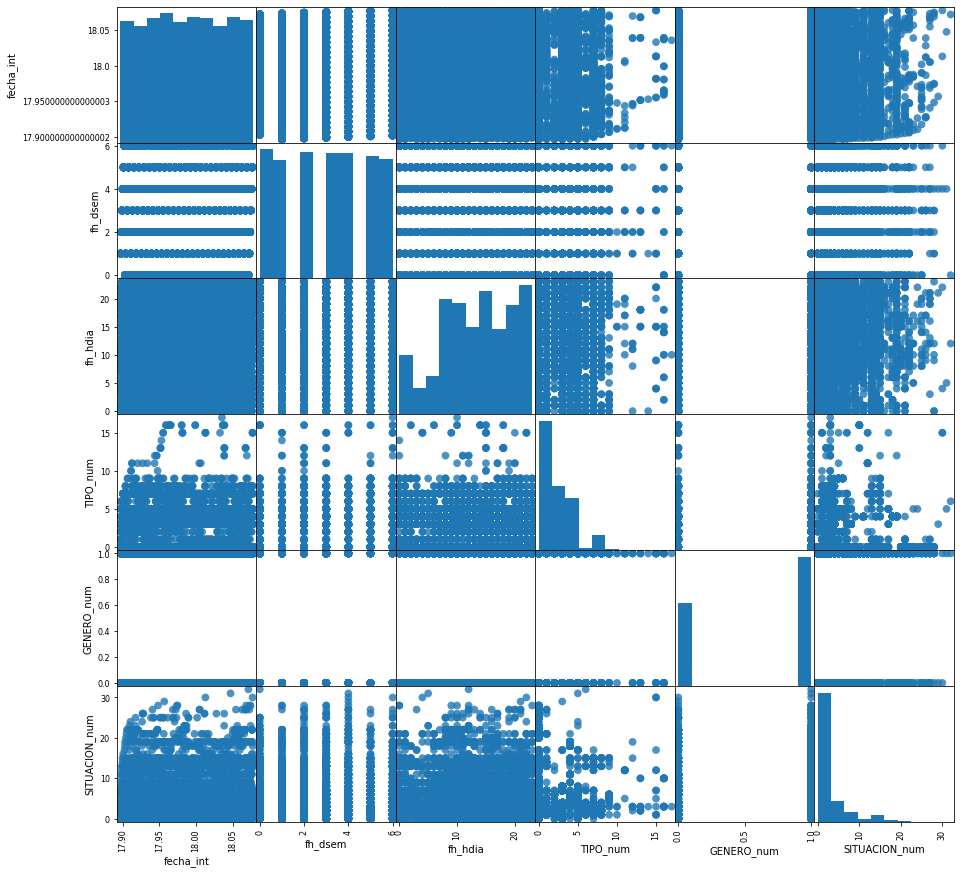

In [40]:
plt.figure(figsize=(15,15), facecolor='white')
g = pd.plotting.scatter_matrix(data100, figsize=(15,15), 
                               marker = 'o', hist_kwds = {'bins': 10}, s = 60, alpha = 0.8)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning

<Figure size 1080x1080 with 0 Axes>

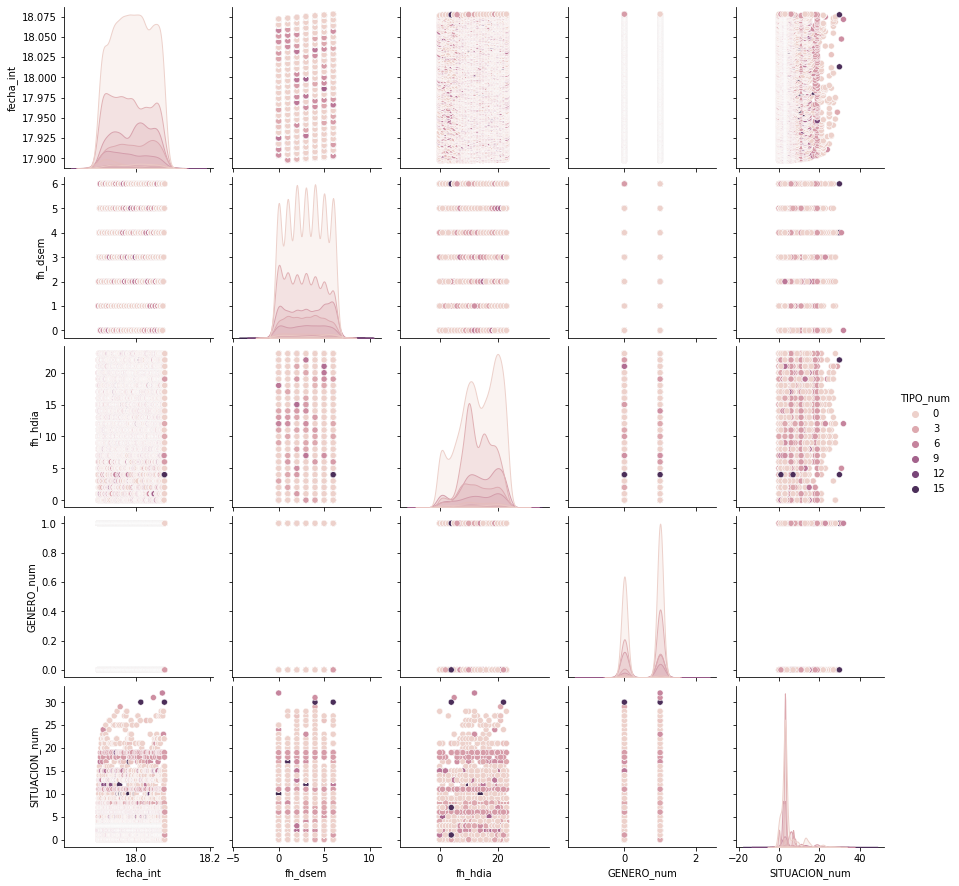

In [46]:
plt.figure(figsize=(15,15), facecolor='white')
sns.pairplot(data100, hue='TIPO_num', height=2.5)
plt.show()

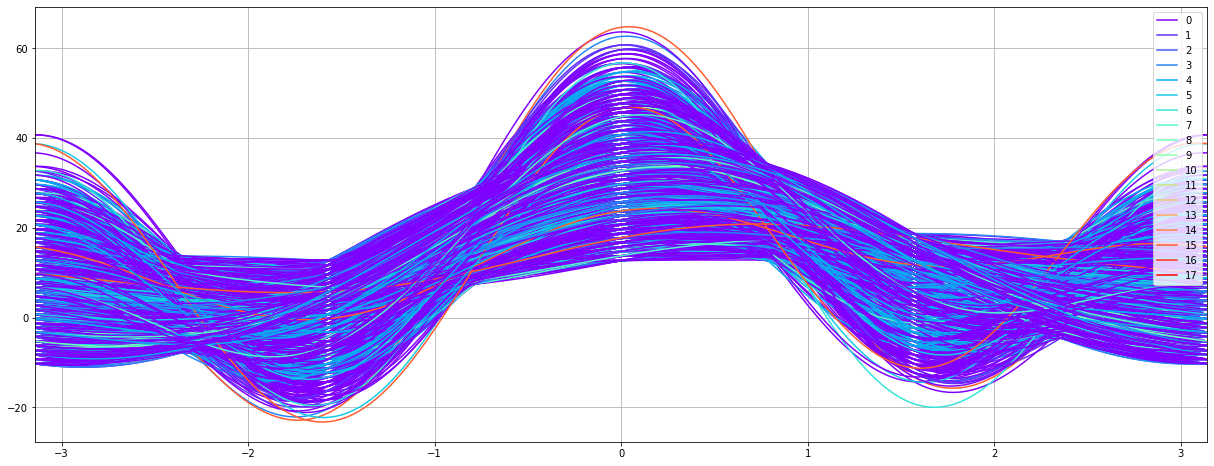

In [49]:
from pandas.plotting import andrews_curves
plt.figure(figsize=(21,8))
andrews_curves(data100, 'TIPO_num',colormap='rainbow')
plt.show()